<a href="https://colab.research.google.com/github/Abhimanyu004/ANN_Projects/blob/main/Customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np

In [43]:
data = pd.read_csv("/content/drive/MyDrive/deep learning data/Churn_Modelling.csv")

In [44]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [45]:
X = data.iloc[:, 3:13]
y = data.iloc[:, 13]

In [46]:
geo = pd.get_dummies(X['Geography'], drop_first=True)
gen = pd.get_dummies(X["Gender"], drop_first=True)

In [47]:
X = pd.concat([X, geo, gen], axis=1)

In [48]:
X = X.drop(["Geography", "Gender"], axis=1)

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=42)

In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [51]:
import keras
from keras import layers

In [52]:
classifier = keras.Sequential(
    [
        layers.Dense(6, kernel_initializer="he_uniform", activation = "relu", name = "layer1", input_shape=(11,)),
        layers.Dense(6, kernel_initializer="he_uniform", activation = "relu", name="layer2"),
        layers.Dense(1, kernel_initializer="glorot_uniform", activation = "sigmoid", name = "outputlayer")
    ]
)

In [53]:
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [54]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=100)

Epoch 1/100
536/536 [==============================] - 3s 3ms/step - loss: 0.5960 - accuracy: 0.7384 - val_loss: 0.5331 - val_accuracy: 0.7785
Epoch 2/100
536/536 [==============================] - 1s 3ms/step - loss: 0.5137 - accuracy: 0.7919 - val_loss: 0.5001 - val_accuracy: 0.7906
Epoch 3/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4909 - accuracy: 0.7964 - val_loss: 0.4862 - val_accuracy: 0.7917
Epoch 4/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4780 - accuracy: 0.7970 - val_loss: 0.4763 - val_accuracy: 0.7914
Epoch 5/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4688 - accuracy: 0.7974 - val_loss: 0.4691 - val_accuracy: 0.7917
Epoch 6/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4618 - accuracy: 0.7977 - val_loss: 0.4634 - val_accuracy: 0.7921
Epoch 7/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4562 - accuracy: 0.7979 - val_loss: 0.4589 - val_accuracy: 0.7914

In [59]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [60]:
import matplotlib.pyplot as plt

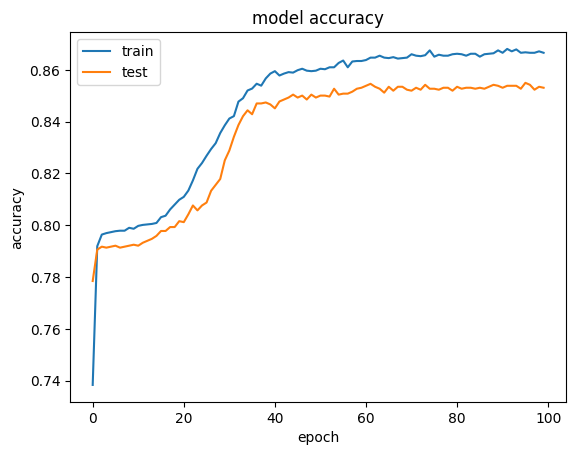

In [62]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

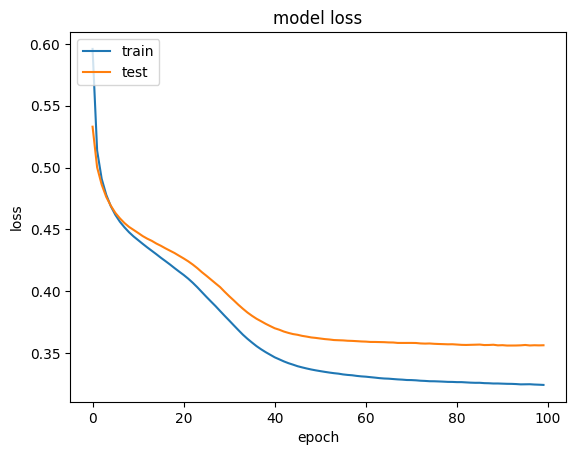

In [63]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [64]:
y_predict = classifier.predict(X_test)
y_predict = (y_predict>0.5)

63/63 [==============================] - 0s 1ms/step


In [66]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)

In [67]:
cm

array([[1542,   65],
       [ 202,  191]])

In [69]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_predict,y_test)

In [70]:
score

0.8665